#Title : Stock Performance Analysis & Forecasting with CAPM





### *Project Description*
This project performs a comprehensive financial analysis of six prominent stocks from India's Nifty 50 index: RELIANCE.NS, TCS.NS, HDFCBANK.NS, INFY.NS, BHARTIARTL.NS, and ITC.NS. Using five years of historical market data, the analysis evaluates each stock's performance and risk profile relative to the broader market, represented by the Nifty 50 index (^NSEI).

The core of the analysis is built upon the *Capital Asset Pricing Model (CAPM), a fundamental financial theory used to determine the expected return on an investment given its systematic risk. The project calculates each stock's **Beta (β)*, which measures its volatility in comparison to the market.

By comparing the stock's actual annualized return against the "fair" or required return calculated by the CAPM, the project generates a clear investment forecast:

* *Buy / Bullish (Undervalued):* Stocks whose actual returns are higher than their CAPM-required returns. These stocks have outperformed what their risk level would predict.
* *Sell / Bearish (Overvalued):* Stocks whose actual returns are lower than what their risk level requires.

The findings are visualized through a *Security Market Line (SML)* plot, which graphically illustrates which stocks are performing above or below the fair-return benchmark.  This is complemented by a comprehensive dashboard that visualizes cumulative returns, systematic risk (Beta), and excess return (Alpha) for each stock, providing a multi-faceted view of the investment landscape.

**The formula is:**

**E(Ri) = Rf + βi × (E(Rm) − Rf)**

Where:

###  Explanation of CAPM Components

- **E(Rᵢ)** → Expected return on the asset  

- **R_f** → Risk-free rate (e.g., the yield on a government bond)  

- **βᵢ (Beta)** → Measure of the asset's volatility relative to the overall market  

  **Interpretation of Beta (β):**
  - β = 1 → The asset moves **in line with the market**  
  - β > 1 → The asset is **more volatile** than the market  
  - β < 1 → The asset is **less volatile** than the market  

- **(E(Rₘ) − R_f)** → Market risk premium, i.e., the **excess return** that investors expect for taking on additional market risk over the risk-free rate.

This project uses CAPM to establish a "fair value" benchmark (the Security Market Line) to judge whether a stock's historical performance justifies its risk.

Of course. Here is the technology stack presented in the requested format.

***

| Category | Tools / Libraries | Purpose |
| :--- | :--- | :--- |
| *Programming Language* | Python | Used for the core logic, data manipulation, and financial calculations. |
| *Libraries Used* | yfinance | To download historical stock market data. |
| | pandas | For handling and analyzing data in DataFrames. |
| | numpy | For advanced numerical operations. |
| | matplotlib | For creating data visualizations, specifically the Security Market Line (SML) plot. |
| *IDE / Editor* | Jupyter Notebook | To write, execute, and document the analysis in an interactive environment. |


1. Install and Import Libraries

In [ ]:
!pip install yfinance


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a professional plotting style for better visuals
plt.style.use('seaborn-v0_8-darkgrid')

2: Configuration and Key Parameters

In [ ]:

# 1. Define the list of NSE stock tickers to analyze from the Nifty 50.
#    Note: ".NS" is required for National Stock Exchange stocks.
tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'BHARTIARTL.NS', 'ITC.NS']

# 2. Define the market index (Nifty 50) as our benchmark
market_index = '^NSEI'

# 3. Set the start and end dates for our historical data (5 years)
#    This provides a robust period for analysis.
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')
start_date = (pd.to_datetime('today') - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

# 4. Set the Risk-Free Rate (Rf)
#    This is typically the yield on the 10-year Indian Government Bond.
#    A reasonable estimate for late 2025 is 7.0%.
risk_free_rate = 0.070

print(f"Analysis period set from {start_date} to {end_date}.")

Analysis period set from 2020-10-08 to 2025-10-08.


3: Download Historical Stock and Market Data

In [ ]:
# Add the market index to our list of tickers to download all data in one go
all_tickers = tickers + [market_index]

# Download all available price data
data = yf.download(all_tickers, start=start_date, end=end_date)

# Drop any rows with missing data to ensure data quality
data.dropna(inplace=True)

# Select the 'Close' column from the MultiIndex DataFrame
adjusted_close_prices = data['Close']

# Display the first few rows and column names to identify the correct column for adjusted close prices
print("Downloaded Price Data (First 5 Rows):")
print(adjusted_close_prices.head())
print("\nColumn Names:")
print(adjusted_close_prices.columns)

/tmp/ipython-input-825416955.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(all_tickers, start=start_date, end=end_date)
[*********************100%***********************]  7 of 7 completed


Downloaded Price Data (First 5 Rows):
Ticker      BHARTIARTL.NS  HDFCBANK.NS      INFY.NS      ITC.NS  RELIANCE.NS  \
Date                                                                           
2020-10-08     407.195312   564.421936   967.156067  136.851456  1015.345947   
2020-10-09     407.914825   584.194275   978.740173  137.424606  1012.716125   
2020-10-12     398.177399   574.769836  1001.113037  140.986069  1014.348389   
2020-10-13     398.417236   567.571289  1023.839722  139.307648  1034.140747   
2020-10-14     396.450623   573.751709  1005.446045  137.383636  1037.224121   

Ticker           TCS.NS         ^NSEI  
Date                                   
2020-10-08  2523.018799  11834.599609  
2020-10-09  2511.634521  11914.200195  
2020-10-12  2526.857422  11930.950195  
2020-10-13  2523.777344  11934.500000  
2020-10-14  2519.338379  11971.049805  

Column Names:
Index(['BHARTIARTL.NS', 'HDFCBANK.NS', 'INFY.NS', 'ITC.NS', 'RELIANCE.NS',
       'TCS.NS', '^NSEI'],
    

4: Calculate Daily Returns

In [ ]:
# Use the pct_change() method to calculate daily returns
returns = data.pct_change()

# Drop the first row of returns as it will be NaN (no previous day to compare)
returns.dropna(inplace=True)

# Separate the market returns from the individual stock returns
market_returns = returns['Close'].drop(columns=[market_index])
stock_returns = returns['Close'].drop(columns=[market_index])

print("\nCalculated Daily Returns ( 5 Rows):")
print(stock_returns.tail())
print("\nCalculated Daily Returns ( 5 Rows):")
print(market_returns.tail())


Calculated Daily Returns ( 5 Rows):
Ticker      BHARTIARTL.NS  HDFCBANK.NS   INFY.NS    ITC.NS  RELIANCE.NS  \
Date                                                                      
2025-09-30      -0.012512     0.000737  0.000000 -0.013996    -0.006410   
2025-10-01      -0.005750     0.014984  0.002774  0.010086     0.003446   
2025-10-03       0.015581    -0.000104  0.000553 -0.003205    -0.003872   
2025-10-06       0.003374     0.008600  0.020324 -0.008781     0.008508   
2025-10-07       0.013609     0.009297 -0.011856 -0.002371     0.007127   

Ticker        TCS.NS  
Date                  
2025-09-30 -0.002659  
2025-10-01  0.008932  
2025-10-03 -0.004221  
2025-10-06  0.029808  
2025-10-07 -0.004919  

Calculated Daily Returns ( 5 Rows):
Ticker      BHARTIARTL.NS  HDFCBANK.NS   INFY.NS    ITC.NS  RELIANCE.NS  \
Date                                                                      
2025-09-30      -0.012512     0.000737  0.000000 -0.013996    -0.006410   
2025-10-01    

### 5: Calculate Beta for Each Stock
(Systematic Risk)

In [ ]:
# Create an empty dictionary to store the calculated beta for each stock
betas = {}

# Explicitly define the market's return series (a single column)
market_series = returns['Close'][market_index]

# Calculate the variance of the market returns
market_variance = market_series.var()

print(f"\nCalculating Betas against market index '{market_index}'...")

# Loop through each stock ticker in the columns of our stock_returns DataFrame
for stock_ticker in stock_returns.columns:

    # Explicitly define the stock's return series (a single column)
    stock_series = stock_returns[stock_ticker]

    # Calculate covariance between the single stock series and the single market series
    covariance = stock_series.cov(market_series)

    # Calculate beta and store it
    beta = covariance / market_variance
    betas[stock_ticker] = beta

print("\nCalculated Betas:")
for stock, beta in betas.items():
    print(f"{stock}: {beta:.2f}")


Calculating Betas against market index '^NSEI'...

Calculated Betas:
BHARTIARTL.NS: 0.83
HDFCBANK.NS: 1.07
INFY.NS: 0.95
ITC.NS: 0.67
RELIANCE.NS: 1.10
TCS.NS: 0.77


###  Calculate Alpha for Each Stock
(Excess Return beyond market performance)
 try not in you made project struture

In [ ]:
# Calculate the average daily returns for each stock and the market
average_stock_returns = stock_returns.mean()
average_market_return = market_series.mean()

# Calculate the average daily risk-free rate
# Convert the annual risk-free rate to a daily rate assuming 252 trading days in a year
average_daily_risk_free_rate = risk_free_rate / 252

# Create an empty dictionary to store the calculated alpha for each stock
alpha_values = {}

print(f"\nCalculating Alphas with a risk-free rate of {risk_free_rate*100:.2f}% (annual)...")

# Loop through each stock ticker and its calculated beta
for stock_ticker, beta in betas.items():
    # Calculate the expected return using the CAPM model
    expected_return = average_daily_risk_free_rate + beta * (average_market_return - average_daily_risk_free_rate)

    # Calculate Alpha
    alpha = average_stock_returns[stock_ticker] - expected_return
    alpha_values[stock_ticker] = alpha

print("\nCalculated Alphas:")
for stock, alpha in alpha_values.items():
    print(f"{stock}: {alpha:.6f}")


Calculating Alphas with a risk-free rate of 7.00% (annual)...

Calculated Alphas:
BHARTIARTL.NS: 0.000806
HDFCBANK.NS: -0.000156
INFY.NS: -0.000194
ITC.NS: 0.000432
RELIANCE.NS: -0.000318
TCS.NS: -0.000338


### 6: Calculate Performance and Generate Forecast
(Calculate Actual vs. Required Returns and Generate Forecast)

In [ ]:

# First, calculate the annualized market return and the market risk premium
# We multiply by 252, the typical number of trading days in a year.
annualized_market_return = market_series.mean() * 252
market_risk_premium = annualized_market_return - risk_free_rate


print(f"\nAnnualized Market Return (Nifty 50): {annualized_market_return:.2%}")
print(f"Market Risk Premium (Market Return - Risk-Free Rate): {market_risk_premium:.2%}")


# Create a list to hold the final results for our summary
results = []


for stock, beta in betas.items():
    # 1. Calculate the stock's actual annualized historical return
    actual_return = stock_returns[stock].mean() * 252


    # 2. Calculate the CAPM required return (the "fair" return)
    capm_return = risk_free_rate + beta * market_risk_premium


    # 3. THE FORECAST: Compare actual return to the CAPM return
    if actual_return > capm_return:
        forecast = 'Buy / Bullish (Undervalued)'
    else:
        forecast = 'Sell / Bearish (Overvalued)'


    results.append({
        'Stock': stock,
        'Beta': beta,
        'Actual_Return': actual_return,
        'CAPM_Return': capm_return,
        'Forecast': forecast
    })




Annualized Market Return (Nifty 50): 16.28%
Market Risk Premium (Market Return - Risk-Free Rate): 9.28%


7:Final Summary Table

In [ ]:
summary_df = pd.DataFrame(results)

# Create a display-friendly version with formatted percentages
summary_df_display = summary_df.copy()
summary_df_display['Actual_Return'] = summary_df_display['Actual_Return'].map('{:.2%}'.format)
summary_df_display['CAPM_Return'] = summary_df_display['CAPM_Return'].map('{:.2%}'.format)
summary_df_display['Beta'] = summary_df_display['Beta'].map('{:.2f}'.format)

print("\n--- Project Analysis Summary ---")
display(summary_df_display[['Stock', 'Beta', 'Actual_Return', 'CAPM_Return', 'Forecast']])


--- Project Analysis Summary ---


,Stock,Beta,Actual_Return,CAPM_Return,Forecast
0,BHARTIARTL.NS,0.83,35.02%,14.72%,Buy / Bullish (Undervalued)
1,HDFCBANK.NS,1.07,13.00%,16.95%,Sell / Bearish (Overvalued)
2,INFY.NS,0.95,10.89%,15.78%,Sell / Bearish (Overvalued)
3,ITC.NS,0.67,24.11%,13.22%,Buy / Bullish (Undervalued)
4,RELIANCE.NS,1.10,9.20%,17.21%,Sell / Bearish (Overvalued)
5,TCS.NS,0.77,5.61%,14.12%,Sell / Bearish (Overvalued)


8: Visualization with the Security Market Line (SML)

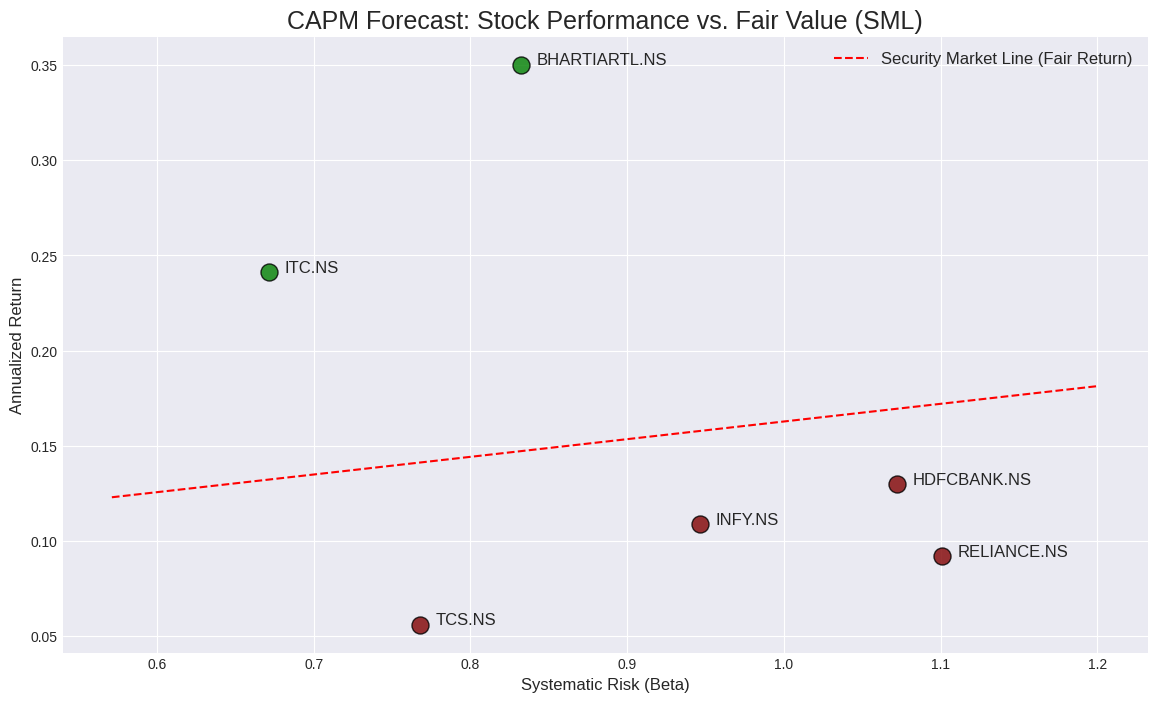

In [ ]:

plt.figure(figsize=(14, 8))

# 1. Plot the Security Market Line (SML) - our "Fair Deal Line"
beta_range = np.linspace(summary_df['Beta'].min() - 0.1, summary_df['Beta'].max() + 0.1, 100)
sml_line = risk_free_rate + beta_range * market_risk_premium
plt.plot(beta_range, sml_line, color='red', linestyle='--', label='Security Market Line (Fair Return)')

# 2. Plot each stock's position and color-code the forecast
for i, row in summary_df.iterrows():
    color = 'green' if 'Buy' in row['Forecast'] else 'maroon'
    plt.scatter(row['Beta'], row['Actual_Return'], s=150, zorder=5, color=color, edgecolors='black', alpha=0.8)
    plt.text(row['Beta'] + 0.01, row['Actual_Return'], f"{row['Stock']}", fontsize=12)

# 3. Format the chart for a professional presentation
plt.title('CAPM Forecast: Stock Performance vs. Fair Value (SML)', fontsize=18)
plt.xlabel('Systematic Risk (Beta)', fontsize=12)
plt.ylabel('Annualized Return', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import yfinance as yf

# Define the list of NSE stock tickers and market index
tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'BHARTIARTL.NS', 'ITC.NS']
market_index = '^NSEI'

# Define the start and end dates for historical data
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')
start_date = (pd.to_datetime('today') - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

# Set the Risk-Free Rate (Rf)
risk_free_rate = 0.070

# ---  Create and Display the Dashboard ---
print("Generating dashboard...")
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "1. Cumulative Returns (vs. Nifty 50)",
        "2. Risk vs. Return (CAPM Analysis)",
        "3. Beta (Systematic Risk)",
        "4. Annualized Alpha (Excess Return)"
    ),
    specs=[[{}, {}], [{}, {}]]
)

# Download the data again within this cell
all_tickers = tickers + [market_index]
data = yf.download(all_tickers, start=start_date, end=end_date)
data.dropna(inplace=True)

# Calculate daily returns on the 'Close' price
returns = data['Close'].pct_change().dropna()

# Separate stock and market returns
stock_returns = returns.drop(columns=[market_index])
market_series = returns[market_index]


# Calculate Beta
betas = {}
market_variance = market_series.var()
for stock_ticker in stock_returns.columns:
    covariance = stock_returns[stock_ticker].cov(market_series)
    beta = covariance / market_variance
    betas[stock_ticker] = beta

# Calculate Alpha
average_stock_returns = stock_returns.mean()
average_market_return = market_series.mean()
average_daily_risk_free_rate = risk_free_rate / 252
alpha_values = {}
for stock_ticker, beta in betas.items():
    expected_return = average_daily_risk_free_rate + beta * (average_market_return - average_daily_risk_free_rate)
    alpha = average_stock_returns[stock_ticker] - expected_return
    alpha_values[stock_ticker] = alpha

# Calculate Annualized Returns and CAPM Returns for summary_df
annualized_market_return = market_series.mean() * 252
market_risk_premium = annualized_market_return - risk_free_rate

results = []
for stock, beta in betas.items():
    actual_return = stock_returns[stock].mean() * 252
    capm_return = risk_free_rate + beta * market_risk_premium
    if actual_return > capm_return:
        forecast = 'Buy / Bullish (Undervalued)'
    else:
        forecast = 'Sell / Bearish (Overvalued)'
    results.append({
        'Stock': stock,
        'Beta': beta,
        'Actual_Return': actual_return,
        'CAPM_Return': capm_return,
        'Forecast': forecast
    })

summary_df = pd.DataFrame(results)


# Graph 1: Cumulative Returns
cumulative_returns = (1 + returns).cumprod()
fig.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns[market_index],
                         mode='lines', name='Nifty 50', line=dict(color='black', dash='dash')),
              row=1, col=1)
for stock in stock_returns.columns:
    fig.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns[stock],
                             mode='lines', name=stock),
                  row=1, col=1)

# Graph 2: CAPM (SML Plot)
beta_range = np.linspace(summary_df['Beta'].min() - 0.1, summary_df['Beta'].max() + 0.1, 100)
sml_line = risk_free_rate + beta_range * market_risk_premium
fig.add_trace(go.Scatter(x=beta_range, y=sml_line, mode='lines', name='Security Market Line',
                         line=dict(color='red', dash='dash')),
              row=1, col=2)
summary_df['Color'] = np.where(summary_df['Actual_Return'] > summary_df['CAPM_Return'], 'green', 'maroon')
fig.add_trace(go.Scatter(x=summary_df['Beta'], y=summary_df['Actual_Return'], mode='markers+text',
                         text=summary_df['Stock'], textposition='top right',
                         marker=dict(color=summary_df['Color'], size=10),
                         name='Stocks', showlegend=False),
              row=1, col=2)

# Graph 3: Beta
beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta']).sort_values('Beta')
fig.add_trace(go.Bar(x=beta_df.index, y=beta_df['Beta'], name='Beta', showlegend=False),
              row=2, col=1)

# Graph 4: Alpha
alpha_df = pd.DataFrame.from_dict(alpha_values, orient='index', columns=['Alpha']).sort_values('Alpha')
colors = ['green' if x > 0 else 'maroon' for x in alpha_df['Alpha']]
fig.add_trace(go.Bar(x=alpha_df.index, y=alpha_df['Alpha'], marker_color=colors, name='Alpha', showlegend=False),
              row=2, col=2)
fig.add_hline(y=0, line_width=1, line_dash="dash", line_color="black", row=2, col=2)

# Update Layout
fig.update_layout(
    title_text="Comprehensive Stock Analysis Dashboard",
    height=700, # Reduced height to better fit the output cell
    xaxis1_title="Date", yaxis1_title="Cumulative Growth",
    xaxis2_title="Beta (Risk)", yaxis2_title="Annualized Return",
    yaxis3_title="Beta Value",
    yaxis4_title="Annualized Alpha (%)",
    showlegend=True,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.update_yaxes(tickformat=".2%", row=1, col=1)
fig.update_yaxes(tickformat=".2%", row=1, col=2)
fig.update_yaxes(tickformat=".2%", row=2, col=2)

fig.show()

/tmp/ipython-input-1090084573.py:33: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[**********************57%**                     ]  4 of 7 completed

Generating dashboard...


[*********************100%***********************]  7 of 7 completed
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning:

invalid value encountered in accumulate



**Project Summary**

This project conducts a financial analysis of a selection of six prominent stocks from India's Nifty 50 index (RELIANCE.NS, TCS.NS, HDFCBANK.NS, INFY.NS, BHARTIARTL.NS, ITC.NS). It uses five years of historical stock price data, downloaded from Yahoo Finance, to evaluate their performance against the market benchmark (the Nifty 50 index, ^NSEI).

The core of the analysis is the Capital Asset Pricing Model (CAPM), which is used to determine the "fair" or required rate of return for each stock based on its systematic risk (Beta). The project calculates each stock's actual annualized return and compares it to the CAPM required return. Based on this comparison, it generates a simple forecast:

Buy / Bullish (Undervalued): If the stock's actual return is higher than its required return.

Sell / Bearish (Overvalued): If the stock's actual return is lower than its required return.

The final results are presented clearly in a summary table and a Security Market Line (SML) plot, which visually shows which stocks are performing above (undervalued) or below (overvalued) the fair return line.

Topic Description: Capital Asset Pricing Model (CAPM)
The central topic of this project is the Capital Asset Pricing Model (CAPM).  This is a fundamental model in finance used to determine the theoretically appropriate required rate of return for an asset. The model considers the asset's sensitivity to non-diversifiable, systematic market risk (represented by Beta, β), as well as the expected return of the market and the return of a theoretical risk-free asset.